# KNN 회귀(Regression)
## 생선의 길이를 사용해 무게를 예측

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 길이와 무게를 산포도로 표현

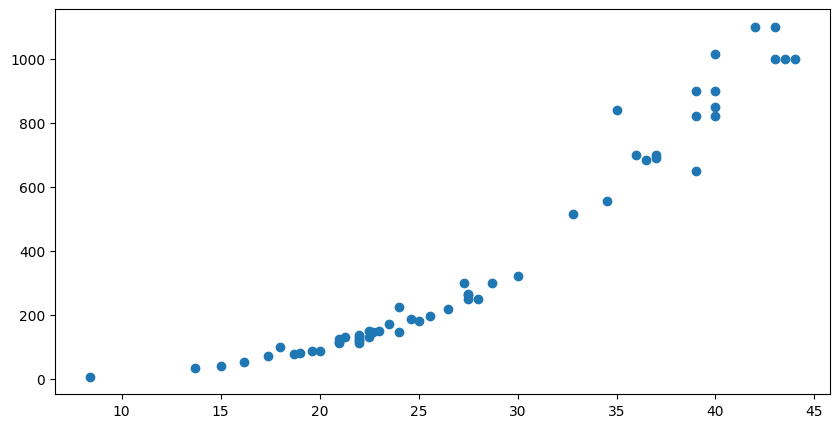

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(fish_length, fish_weight)
plt.show()

#### Train과 Test 분리

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_input, test_input, train_target, test_target = \
    train_test_split(fish_length, fish_weight, random_state=42)

In [9]:
print(train_input.shape, test_input.shape)
# 현재 trina_input에는 row는 있는데 column이 없음

(42,) (14,)


In [10]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [11]:
# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [14]:
print(train_input.shape, test_input.shape)      #column생겼으므로 이제 scikit 사용 가능

(42, 1) (14, 1)


### 회귀모델 사용

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
knr = KNeighborsRegressor()     
knr.fit(train_input, train_target)  # train으로 학습

KNeighborsRegressor()

In [19]:
knr.score(test_input, test_target)  # test로 예측

0.992809406101064

##### 평균 절대값 오차(mae) : 결정계수 (R^2)   
R^2  = 1 - ((타겟 - 예측)^2 의 합 / (타깃 - 평균)^2 의 합)

> 평균 절대값 오차를 구하는 이유는 예측력이 높아도 확실히 높은 것인지 확인
- 오차는 작은 게 좋다

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

### 과대적합(overfitting)과 과소적합(underfitting)

In [22]:
# train
knr.score(train_input, train_target)

0.9698823289099254

In [23]:
# test
knr.score(test_input, test_target)

0.992809406101064

> train보다 test의 점수가 잘 나왔으므로 과소적합이 발생했다.    
보통은 train점수가 test의 점수보다 조금 더 잘 나온 과대적합을 기준으로 삼는다.      

### knn의 Hyper parameter를 조절        
default : 5 -> 3        # 짝수는 안됨 but 2는 가능하다.

In [24]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print("Train Score :", knr.score(train_input, train_target))
print("Test Score :", knr.score(test_input, test_target))

Train Score : 0.9804899950518966
Test Score : 0.9746459963987609


> 이웃의 개수를 줄이면 과대적합되고, 이웃의 개수를 늘리면 과소적합으로 구성됨

In [30]:
knr.n_neighbors = 10
knr.fit(train_input, train_target)
print("Train Score :", knr.score(train_input, train_target))
print("Test Score :", knr.score(test_input, test_target))

Train Score : 0.96164569026043
Test Score : 0.9737908255822255


### 이웃의 개수 조절로 확인

K ==> 1
Train Score : 0.9852830341215901
Test Score : 0.991309195814175
------------------------------


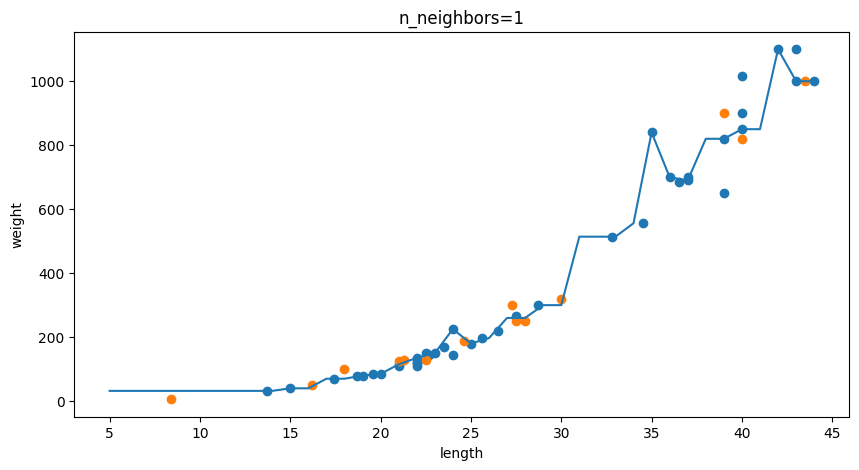

K ==> 3
Train Score : 0.9804899950518966
Test Score : 0.9746459963987609
------------------------------


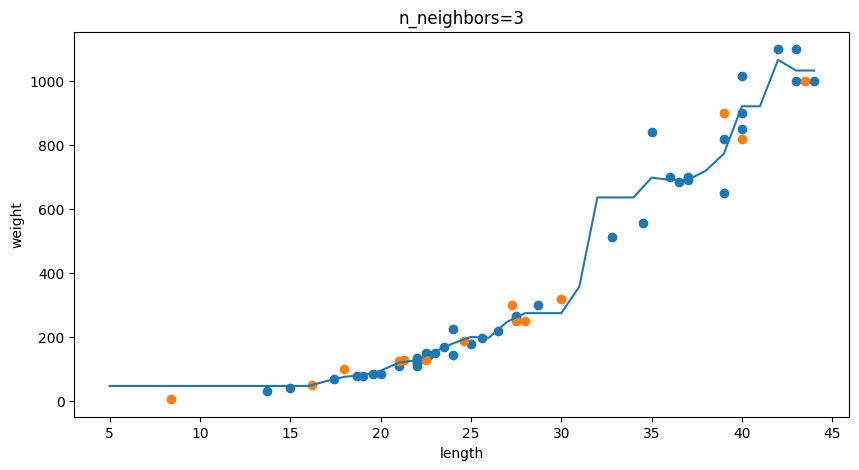

K ==> 5
Train Score : 0.9698823289099254
Test Score : 0.992809406101064
------------------------------


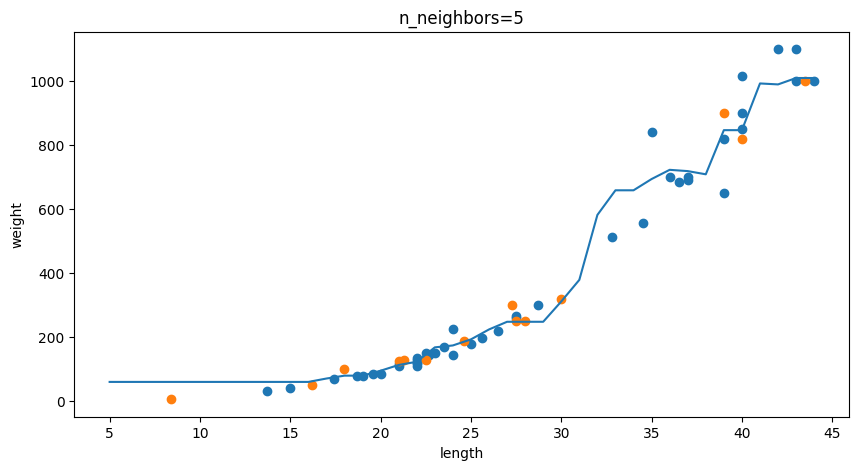

K ==> 10
Train Score : 0.96164569026043
Test Score : 0.9737908255822255
------------------------------


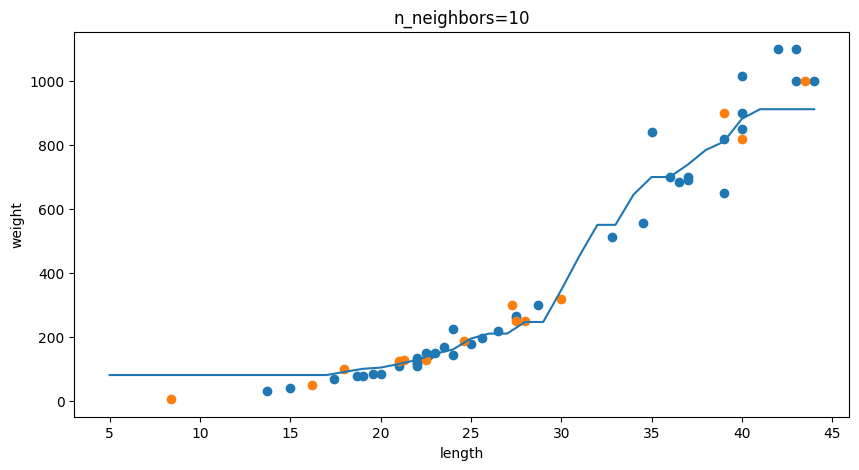

In [34]:
knr = KNeighborsRegressor()

# x좌표
x = np.arange(5, 45).reshape(-1, 1)

for n in [1,3,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    print("K ==>", n)
    print("Train Score :", knr.score(train_input, train_target))
    print("Test Score :", knr.score(test_input, test_target))
    print("-" * 30)
    
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    
    # 훈련세트와 검증세트의 예측 결과 그래프 그리기
    plt.figure(figsize=(10,5))
    plt.scatter(train_input, train_target)
    plt.scatter(test_input, test_target)
    plt.plot(x, prediction)
    plt.title("n_neighbors=%d"%n)
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()


- 과소적합일수록 선 그래프가 노란색에 가깝고
- 과대적합일수록 선 그래프가 파란색에 가깝다